In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
def windmill(isInside, yHeight, maxSU=512, minSU=0) -> int:
    if yHeight > 312: yHeight = 312 
    elif yHeight < -64: yHeight = 1
    else: yHeight = yHeight + 65
    if isInside: return ((math.floor(math.log((yHeight*(maxSU//377)) + minSU, 1.1)))  // 3) * 10
    else: return (math.floor(math.log((yHeight*(maxSU//377)) + minSU, 1.1))) * 10

In [10]:
# fuelConsumptionRate = mb/peice of fuel
from cProfile import label


def steam_engine(totalWaterSupply, maxSU, fuelConsumptionRate, totalFuelSupply):
    return (totalFuelSupply*fuelConsumptionRate) * totalWaterSupply

def plot_steam_engine(totalWaterSupply, maxSU, fuelConsumptionRate, totalFuelSupply):
    uses, fuelsupply, SUout, water = [], [], [], []
    for i in range(totalFuelSupply, 0):
        if totalWaterSupply:
            totalWaterSupply -= fuelConsumptionRate
        else:
            totalWaterSupply = 0
            uses.append(0)
            SUout.append(0)
        uses.append((totalFuelSupply*fuelConsumptionRate) * totalWaterSupply)
        fuelsupply.append(i)
        SUout.append(maxSU)
        water.append(totalWaterSupply)
    
    print(uses)
    print(fuelsupply)
    print(SUout)
    print(water)
    plt.plot(uses, label="Remaining Uses")
    plt.plot(fuelsupply, label="Fuel supply")
    plt.plot(SUout, label="SU output")
    plt.plot(water, label="Water consumption")
    plt.title("Steam engine Power Generation")
    plt.legend()
    plt.ylabel("SU output")
    plt.xlabel("Y height (-64 -> 312)")
    plt.show()


In [7]:
windmill(isInside=True, yHeight=312)

200

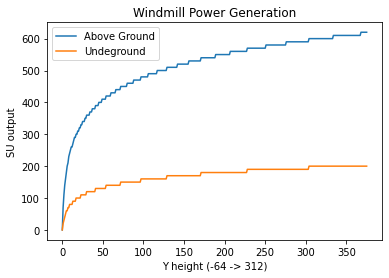

In [8]:
inside, outside = [], []

for y in range(-64, 312):
    inside.append(windmill(isInside=True, yHeight=y, minSU=0))
    outside.append(windmill(isInside=False, yHeight=y, minSU=0))

plt.plot(outside, label="Above Ground")
plt.plot(inside, label="Undeground")
plt.title("Windmill Power Generation")
plt.legend()
plt.ylabel("SU output")
plt.xlabel("Y height (-64 -> 312)")
plt.show()

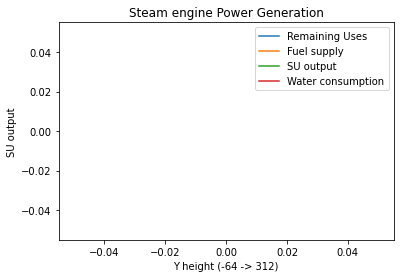

In [11]:
plot_steam_engine(4000, 1024, 8, 512)